# Tasks:

1. run segmentation for DNA

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

1680


In [3]:
import numpy as np
#from cellpose import models, utils
import os
import sys
import cv2
import h5py 
import ast

import pandas as pd
sys.path.append(r"..\..\..\..\Documents")
from ImageAnalysis3.io_tools.crop import generate_neighboring_crop
from skimage.segmentation import random_walker

channel_2_th = {
    '750':1000,
    '647':1500,
}
overwrite=False

#import torch
#torch.cuda.set_device('cuda:1')

print(os.getpid())

1680


In [6]:
save_folder = r'\\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230'
save_filenames = [os.path.join(save_folder, _fl) for _fl in os.listdir(save_folder)
                  if _fl.split(os.extsep)[-1]=='hdf5'][:15]
print(len(save_filenames))
segmentation_folder = os.path.join(save_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    os.makedirs(segmentation_folder)
cand_spots_folder = os.path.join(save_folder, 'CandSpots')
if not os.path.exists(cand_spots_folder):
    os.makedirs(cand_spots_folder)

15


In [8]:
figure_folder = os.path.join(save_folder, 'Figures')
if not os.path.exists(figure_folder):
    print(f"Create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"Use figure_folder: {figure_folder}")
    
cand_spot_folder = os.path.join(save_folder, 'CandSpots')
if not os.path.exists(cand_spot_folder):
    os.makedirs(cand_spot_folder)
    print(f"Creating cand_spot_folder: {cand_spot_folder}")
else:
    print(f"Use cand_spot_folder: {cand_spot_folder}")

Use figure_folder: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Figures
Use cand_spot_folder: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\CandSpots


## run segmentation

In [6]:
from ImageAnalysis3.segmentation_tools import cell

2022-01-19 11:59:20,599 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log


In [9]:
%matplotlib inline

for _filename in save_filenames:
    
    with h5py.File(_filename, "r", libver='latest') as _f:
        
        fov_id = _f.attrs['fov_id']
        
        #polyt_im = _f['protein']['ims'][0]
        dapi_im = _f.attrs['dapi_im']
        
        parameters = ast.literal_eval(_f.attrs['shared_parameters']) 
        combo_spots_list = [_spots[_spots[:,0]>0] for _spots in _f['combo']['spots'][:]]
        combo_channels = [_ch.decode() for _ch in _f['combo']['channels'][:]]
        
    pixel_sizes = parameters['distance_zxy']
    single_im_size = parameters['single_im_size']

    segmentation_filename = os.path.join(segmentation_folder, 
                                         os.path.basename(_filename).replace('.hdf5', '_Segmentation.npy') )
    break
    visual_tools.imshow_mark_3d_v2([dapi_im])
    seg_class = cell.Cellpose_Segmentation_3D(dapi_im, None, 
                                              pixel_sizes=pixel_sizes,
                                              save_filename=segmentation_filename,
                                              )

    _masks = seg_class.run()
    seg_class.save()
    seg_class.clear()
    #delattr(seg_class, 'segmentation_masks')
    #del(seg_class)

## check seg

<IPython.core.display.Javascript object>


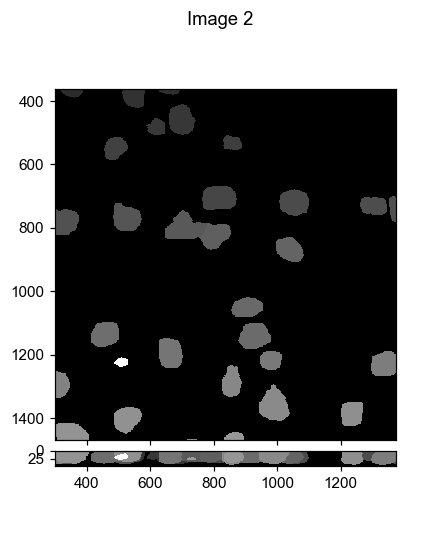

In [10]:
%matplotlib notebook
_mask = np.load(segmentation_filename)

visual_tools.imshow_mark_3d_v2([dapi_im, _mask])

## Partition spots into cellsm

In [11]:
from ImageAnalysis3.meta_tools.partition_spots import Spots_Partition
reload(ia.meta_tools.partition_spots)
from ImageAnalysis3.classes.preprocess import Spots3D
reload(io_tools.crop)

<module 'ImageAnalysis3.io_tools.crop' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\io_tools\\crop.py'>

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 59
- Number of field of views: 159
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 5
- Number of field of views: 160
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12', 'H62U1

<IPython.core.display.Javascript object>


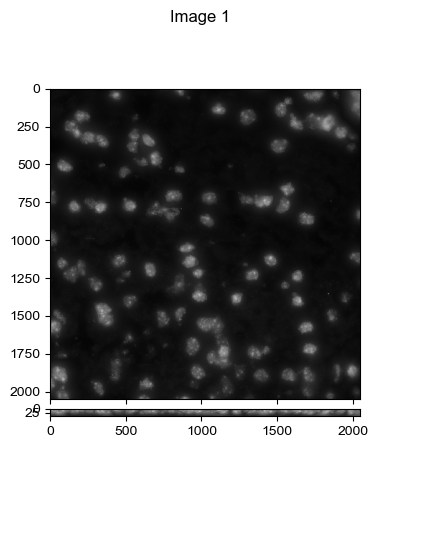

+ loading combo from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_000.hdf5
++ finish loading combo in 0.283s. 
- Partition spots
-- partition barcodes for 7658 spots
-- calculate local DAPI signal for 7658 spots
-- partition barcodes for 16341 spots
-- calculate local DAPI signal for 16341 spots
-- partition barcodes for 7544 spots
-- calculate local DAPI signal for 7544 spots
-- partition barcodes for 14517 spots
-- calculate local DAPI signal for 14517 spots
-- partition barcodes for 10488 spots
-- calculate local DAPI signal for 10488 spots


In [ ]:
# DNA_fov

fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230',
                            r'\\10.245.74.158\Chromatin_NAS_6\20220109-CTP11-1000_CTP12-DNA_from_1230',],
             'save_folder':r'J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230',
             'experiment_type': 'DNA',
             'num_threads': 34,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }

dapi_th = 2000

pixel_sizes = np.array(fov_param['shared_parameters']['distance_zxy'])

for _fov_id in np.arange(0, 15):
    # create fov class
    dna_fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    dna_fov._load_dapi_image()
    visual_tools.imshow_mark_3d_v2([dna_fov.dapi_im])
    # load segmentation
    seg_label = np.load(os.path.join(segmentation_folder, 
                 os.path.basename(dna_fov.save_filename).replace('.hdf5', '_Segmentation.npy')))
    # load spots
    dna_fov._load_from_file('combo')
    all_spots_list = [Spots3D(_spots, bits=_id, pixel_sizes=pixel_sizes) for _spots, _id in zip(dna_fov.combo_spots_list, dna_fov.combo_ids)]
    # class
    sp = Spots_Partition(seg_label, "", 
                         search_radius=10, pixel_sizes=pixel_sizes,
                         save_filename=None)

    cell_2_spots = {_c:{} for _c in np.unique(seg_label)[np.unique(seg_label)>0]}

    label_dict = {}
    signal_dict = {}
    
    for _spots, _id in zip(all_spots_list, dna_fov.combo_ids):
        _labels = sp.spots_to_labels(sp.segmentation_masks, _spots, search_radius=sp.search_radius)

        _signals = sp.spots_to_DAPI(dna_fov.dapi_im, _spots, search_radius=sp.search_radius)

        label_dict[_id] = _labels
        signal_dict[_id] = _signals
        # parittion
        for _l in np.unique(_labels):
            if _l > 0:
                cell_2_spots[_l][_id] = _spots[(_labels==_l) * (_signals > dapi_th)]
                cell_2_spots[_l][_id].bits = _spots.bits[(_labels==_l) * (_signals > dapi_th)]
    
    %matplotlib inline  
    for _bit_id, _bit in enumerate(dna_fov.combo_ids):

        fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

        ax.imshow(dna_fov.dapi_im.max(0), cmap='Greys', vmin=1000, vmax=10000)

        _ref_coords = all_spots_list[_bit_id].to_coords()
        ax.scatter(_ref_coords[:,2], _ref_coords[:,1], s=0.75, color=[1,0,1])

        sel_inds = label_dict[_bit] > 0
        _coords = all_spots_list[_bit_id][sel_inds].to_coords()

        ax.scatter(_coords[:,2], _coords[:,1], s=0.75, c=label_dict[_bit][sel_inds], cmap='Spectral')

        ax.set_aspect('equal')

        ax.set_title(f"Spot partition, bit-{_bit}")

        ax.set_xlim(0, 2048)
        ax.set_ylim(2048, 0)
        fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotPartition_{_bit}.png')))
        fig.show()
    
    cell_spots_counts = []
    for _cell, _spots_dict in cell_2_spots.items():
        _spots_counts = []
        for _bit in dna_fov.combo_ids:
            if _bit in _spots_dict:
                _spots_counts.append(len(_spots_dict[_bit]))
            else:
                _spots_counts.append(0)
        cell_spots_counts.append(np.array(_spots_counts))
    cell_spots_counts = np.array(cell_spots_counts)


    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

    _pf = ax.imshow(cell_spots_counts, cmap='Spectral_r', vmin=0, vmax=60)

    ax.tick_params('both', labelsize=8, 
                    width=0.5, length=2,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]

    ax.set_xlabel('Bit', fontsize=8, labelpad=1)

    ax.set_ylabel('Cell id', fontsize=8, labelpad=0)
    # locate ax
    divider = make_axes_locatable(ax)
    # colorbar ax
    cax = divider.append_axes('right', size='7%', pad="5%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax, )

    cbar.ax.tick_params('both', labelsize=8, 
                    width=0.5, length=2,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax
    cbar.outline.set_linewidth(0.5)
    cbar.set_label('CandSpots count', 
                   fontsize=8, labelpad=5, rotation=270)

    fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotCounts.png')))
    #fig.show()
    
    # save spots
    for _cell_id, _spots_list in cell_2_spots.items():
        _cand_filename = os.path.join(cand_spot_folder, os.path.basename(dna_fov.save_filename).replace('.hdf5', f'_Cell-{_cell_id}_CandSpots.pkl') )
        print(_cand_filename)
        pickle.dump(_spots_list, open(_cand_filename, 'wb'))

<IPython.core.display.Javascript object>


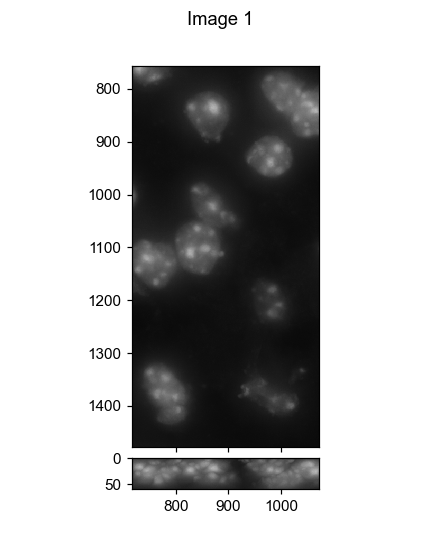

In [5]:
visual_tools.imshow_mark_3d_v2([dna_fov.dapi_im])

In [47]:
# load segmentation
seg_label = np.load(os.path.join(segmentation_folder, 
             os.path.basename(dna_fov.save_filename).replace('.hdf5', '_Segmentation.npy')))
# load spots
dna_fov._load_from_file('combo')
# load parameters
#pixel_sizes = dna_fov.shared_parameters['distance_zxy']
#single_im_size = dna_fov.shared_parameters['single_im_size']

all_spots_list = [Spots3D(_spots, bits=_id, pixel_sizes=pixel_sizes) for _spots, _id in zip(dna_fov.combo_spots_list, dna_fov.combo_ids)]

dapi_th = 2000

+ loading combo from file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Conv_zscan_05.hdf5


In [66]:
#reload(ia.meta_tools.partition_spots)

from ImageAnalysis3.meta_tools.partition_spots import Spots_Partition
reload(ia.meta_tools.partition_spots)
from ImageAnalysis3.classes.preprocess import Spots3D
reload(io_tools.crop)

<module 'ImageAnalysis3.io_tools.crop' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\io_tools\\crop.py'>

In [ ]:
%%time
sp = Spots_Partition(seg_label, "", 
                     search_radius=10, #pixel_sizes=pixel_sizes,
                     save_filename=None)

cell_2_spots = {_c:{} for _c in np.unique(seg_label)[np.unique(seg_label)>0]}

label_dict = {}
signal_dict = {}

In [68]:
%%time
for _spots, _id in zip(all_spots_list, dna_fov.combo_ids):
    _labels = sp.spots_to_labels(sp.segmentation_masks, _spots, search_radius=sp.search_radius)

    _signals = sp.spots_to_DAPI(dna_fov.dapi_im, _spots, search_radius=sp.search_radius)
    
    label_dict[_id] = _labels
    signal_dict[_id] = _signals
    # parittion
    for _l in np.unique(_labels):
        if _l > 0:
            cell_2_spots[_l][_id] = _spots[(_labels==_l) * (_signals > dapi_th)]
            cell_2_spots[_l][_id].bits = _spots.bits[(_labels==_l) * (_signals > dapi_th)]

- partition barcodes for 9920 spots
- calculate local DAPI signal for 9920 spots
- partition barcodes for 12200 spots
- calculate local DAPI signal for 12200 spots
- partition barcodes for 9828 spots
- calculate local DAPI signal for 9828 spots
- partition barcodes for 13482 spots
- calculate local DAPI signal for 13482 spots
- partition barcodes for 10041 spots
- calculate local DAPI signal for 10041 spots
- partition barcodes for 11664 spots
- calculate local DAPI signal for 11664 spots
- partition barcodes for 10501 spots
- calculate local DAPI signal for 10501 spots
- partition barcodes for 12686 spots
- calculate local DAPI signal for 12686 spots
- partition barcodes for 10478 spots
- calculate local DAPI signal for 10478 spots
- partition barcodes for 13027 spots
- calculate local DAPI signal for 13027 spots
- partition barcodes for 9891 spots
- calculate local DAPI signal for 9891 spots
- partition barcodes for 12603 spots
- calculate local DAPI signal for 12603 spots
- partitio

## visualize partiton results

In [ ]:
def visualize_spot_partitions(_spots, _labels, 
                              save=True, figure_folder=None, )

In [ ]:
%matplotlib inline
for _bit_id, _bit in enumerate(dna_fov.combo_ids):
    
    fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

    ax.imshow(dna_fov.dapi_im.max(0), cmap='Greys', vmin=1000, vmax=10000)

    _ref_coords = all_spots_list[_bit_id].to_coords()
    ax.scatter(_ref_coords[:,2], _ref_coords[:,1], s=0.75, color=[1,0,1])

    sel_inds = label_dict[_bit] > 0
    _coords = all_spots_list[_bit_id][sel_inds].to_coords()

    ax.scatter(_coords[:,2], _coords[:,1], s=0.75, c=label_dict[_bit][sel_inds], cmap='Spectral')

    ax.set_aspect('equal')
    
    ax.set_title(f"Spot partition, bit-{_bit}")
    
    ax.set_xlim(0, 2048)
    ax.set_ylim(2048, 0)
    fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotPartition_{_bit}.png')))
    fig.show()
    

## number of spots per bits per cell

<IPython.core.display.Javascript object>


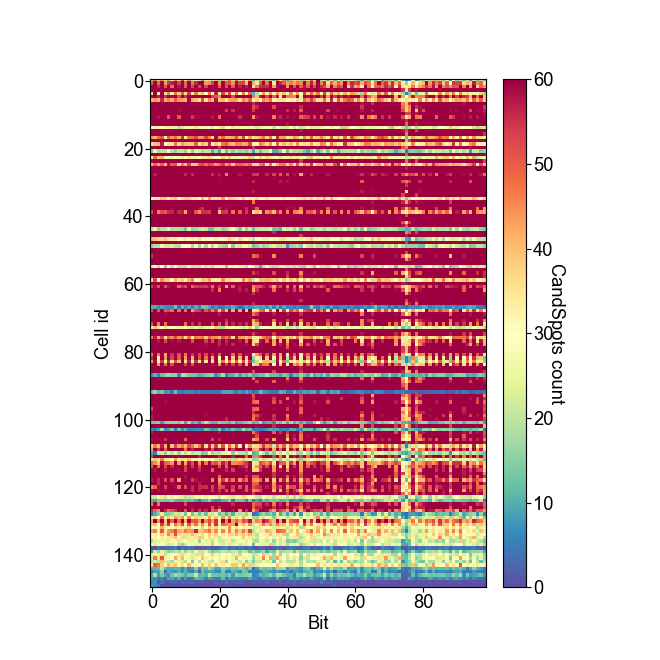

In [81]:
cell_spots_counts = []
for _cell, _spots_dict in cell_2_spots.items():
    _spots_counts = []
    for _bit in dna_fov.combo_ids:
        if _bit in _spots_dict:
            _spots_counts.append(len(_spots_dict[_bit]))
        else:
            _spots_counts.append(0)
    cell_spots_counts.append(np.array(_spots_counts))
cell_spots_counts = np.array(cell_spots_counts)


from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

_pf = ax.imshow(cell_spots_counts, cmap='Spectral_r', vmin=0, vmax=60)

ax.tick_params('both', labelsize=8, 
                width=0.5, length=2,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

ax.set_xlabel('Bit', fontsize=8, labelpad=1)

ax.set_ylabel('Cell id', fontsize=8, labelpad=0)
# locate ax
divider = make_axes_locatable(ax)
# colorbar ax
cax = divider.append_axes('right', size='7%', pad="5%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax, )

cbar.ax.tick_params('both', labelsize=8, 
                width=0.5, length=2,
                pad=1, labelleft=False) # remove bottom ticklabels for ax
cbar.outline.set_linewidth(0.5)
cbar.set_label('CandSpots count', 
               fontsize=8, labelpad=5, rotation=270)

fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotCounts.png')))
fig.show()

## Save

In [82]:
# save spots
for _cell_id, _spots_list in cell_2_spots.items():
    _cand_filename = os.path.join(cand_spot_folder, os.path.basename(dna_fov.save_filename).replace('.hdf5', f'_Cell-{_cell_id}_CandSpots.pkl') )
    print(_cand_filename)
    pickle.dump(_spots_list, open(_cand_filename, 'wb'))

H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-1_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-2_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-3_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-4_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-5_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-6_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-7_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-8_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-9_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-10_CandSpots.pkl
H:\Pu_Temp\

H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-115_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-116_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-117_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-118_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-119_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-120_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-121_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-122_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-123_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-124_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Ca

# Test decode

## load codebook

In [83]:
import pandas as pd
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'
#
codebook_df = pd.read_csv(codebook_filename, header=0)
codebook_df

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_824,NDB_712,NDB_818,NDB_940,NDB_872,NDB_934,NDB_926,NDB_910,chr,chr_order
0,1:3740000-3760000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1:6240000-6260000,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1:8740000-8760000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,1:11240000-11260000,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
4,1:13740000-13760000,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,X:161240000-161260000,1057,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,X,52
984,X:163740000-163760000,1058,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,X,53
985,X:166240000-166260000,1059,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,X,54
986,X:168740000-168760000,1060,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,X,55


## load spot files

In [90]:
spot_filenames = [os.path.join(cand_spot_folder, _fl) for _fl in os.listdir(cand_spot_folder)]
print(len(spot_filenames))

150


In [91]:
import multiprocessing as mp
from ImageAnalysis3.classes import decode
reload(decode)
decode_args = [(_fl, codebook_df) for _fl in spot_filenames[:]
               if not os.path.exists(_fl.replace('CandSpots', 'Decoder'))]
print(len(decode_args))

150


In [ ]:
from ImageAnalysis3.classes import decode
reload(decode)
from ImageAnalysis3.classes import decode

In [115]:
%%time
with mp.Pool(44) as decode_pool:
    decode_results = decode_pool.starmap(decode.batch_decode_DNA, decode_args[:], chunksize=1)
    decode_pool.close()
    decode_pool.join()
    decode_pool.terminate()

Wall time: 2min 44s


# load decode results

In [116]:
decode_folder = r'H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Decoder'

decode_files = [os.path.join(decode_folder, _fl) for _fl in os.listdir(decode_folder) 
                if _fl.split(os.path.extsep)[-1]=='pkl']
print(len(decode_files))

115


In [117]:

%%time
import multiprocessing as mp
load_args = [(_fl, 'chr_2_zxys_list') for _fl in decode_files[:]]
print(len(load_args))
with mp.Pool(44) as load_pool:
    all_chr_2_zxys_list = load_pool.starmap(decode.batch_load_attr, 
                                            load_args, chunksize=1)
    load_pool.close()
    load_pool.join()
    load_pool.terminate()

all_chr_2_zxys_list = [_item for _item in all_chr_2_zxys_list if _item is not None]
print(len(all_chr_2_zxys_list))

115
115
Wall time: 5.19 s


In [118]:
%%time
import multiprocessing as mp

summary_args = [(_item, codebook_df) for _item in all_chr_2_zxys_list ]

with mp.Pool(44) as summary_pool:
    all_zxys_list = summary_pool.starmap(decode.DNA_Merfish_Decoder.summarize_zxys_by_regions, 
                                         summary_args, chunksize=1)
    summary_pool.close()
    summary_pool.join()
    summary_pool.terminate()

Wall time: 11.5 s


In [119]:
all_zxys_list = np.concatenate(all_zxys_list)

In [120]:
from scipy.spatial.distance import cdist,pdist,squareform
from tqdm import tqdm

In [121]:
all_distmaps = [squareform(pdist(_zxys)) for _zxys in tqdm(all_zxys_list)]

100%|████████████████████████████████████████████████████████████████████████████████| 230/230 [00:02<00:00, 77.75it/s]


In [123]:
%%time
from ImageAnalysis3.classes import postanalysis
median_distmap = postanalysis.parallel_reduce_matrix(all_distmaps, function='nanmedian', axis=0,
                                                     num_threads=44)

Wall time: 9.37 s


In [125]:
_ordered_chr_names = []
for _chr_name, _chr_reg_id in zip(codebook_df['chr'], codebook_df['chr_order']):
    if _chr_name not in _ordered_chr_names:
        _ordered_chr_names.append(_chr_name)
chr_2_indices = {_chr:np.array(codebook_df.loc[codebook_df['chr']==_chr].index)
                for _chr in np.unique(codebook_df['chr'].values)}

_labels_edges = np.array([0] + [np.max(chr_2_indices[_chr]) for _chr in _ordered_chr_names])

<IPython.core.display.Javascript object>


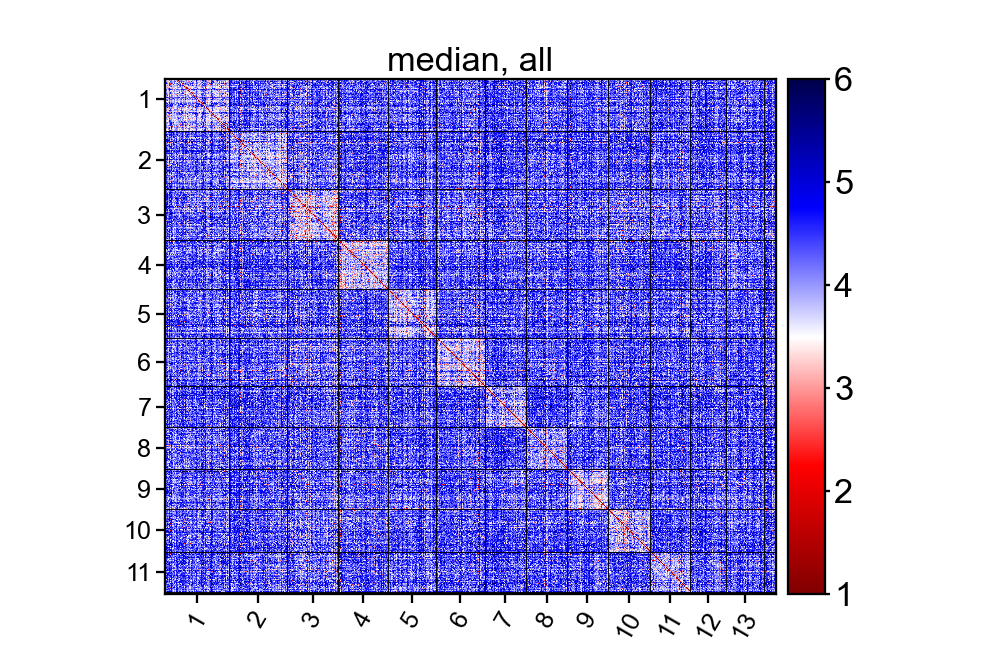

In [134]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(3,2), dpi=300)

ia.figure_tools.distmap.plot_distance_map(median_distmap, color_limits=[1,6],
                                          ax=ax,
                                          )
ax.set_title('median, all', fontsize=7.5, pad=2)

ax.set_xticks((_labels_edges[1:] + _labels_edges[:-1])/2)
ax.set_xticklabels(_ordered_chr_names, fontsize=5.5, rotation=60,)
ax.set_yticks((_labels_edges[1:] + _labels_edges[:-1])/2)
ax.set_yticklabels(_ordered_chr_names, fontsize=5.5, )

ax.hlines(_labels_edges, 0, len(median_distmap), color='black', linewidth=0.2)
ax.vlines(_labels_edges, 0, len(median_distmap), color='black', linewidth=0.2)

plt.gcf().subplots_adjust(bottom=0.1, left=0.1, right=0.9,)

fig.savefig(os.path.join(figure_folder, 'all_median_distmap.png'), transparent=True)
fig.show()